<a href="https://colab.research.google.com/github/hazem1379/Airbnb--Stockholm/blob/master/Stockhlom_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Airbnb: Stockholm story with interactive maps

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [10]:
pip install chart_studio

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
#import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=False)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [12]:
!pip install poltly

ERROR: Could not find a version that satisfies the requirement poltly (from versions: none)
ERROR: No matching distribution found for poltly


In [13]:
from google.colab import files
uploaded = files.upload()

In [0]:
#/content/drive/My Drive/airbnb

In [0]:
listings = pd.read_csv("/content/drive/My Drive/airbnb/listings.csv", index_col= "id")
listings_details = pd.read_csv("/content/drive/My Drive/airbnb/listingsD.csv", index_col= "id", low_memory=False)
calendar = pd.read_csv("/content/drive/My Drive/airbnb/calendar.csv", parse_dates=['date'], index_col=['listing_id'])
#reviews = pd.read_csv("/content/drive/My Drive/airbnb/reviews.csv", parse_dates=['date'], index_col=['listing_id'])
reviews_details = pd.read_csv("/content/drive/My Drive/airbnb/reviewsD.csv", parse_dates=['date']) #, index_col=['id'])

In [16]:
print(listings.shape)

(7432, 15)


In [17]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [18]:
listings.head()

name  ...  availability_365
id                                                   ...                  
155220                Stockholm, new spacoius villa  ...                 0
155685                   Hornstull with water view!  ...                 0
164448  Double room in central Stockholm with Wi-Fi  ...               169
170651           Petit Charm Rooftop next to heaven  ...               255
206221          Doubleroom at Södermalm &trendySofo  ...               239

[5 rows x 15 columns]

In [19]:
target_columns = ["property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate", "street", "weekly_price", "monthly_price", "market"]
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7432 entries, 155220 to 43298729
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            7407 non-null   object 
 1   host_id                         7432 non-null   int64  
 2   host_name                       7432 non-null   object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   7432 non-null   object 
 5   latitude                        7432 non-null   float64
 6   longitude                       7432 non-null   float64
 7   room_type                       7432 non-null   object 
 8   price                           7432 non-null   int64  
 9   minimum_nights                  7432 non-null   int64  
 10  number_of_reviews               7432 non-null   int64  
 11  last_review                     5866 non-null   object 
 12  reviews_per_month        

In [20]:
listings.head()

name  ...     market
id                                                   ...           
155220                Stockholm, new spacoius villa  ...  Stockholm
155685                   Hornstull with water view!  ...  Stockholm
164448  Double room in central Stockholm with Wi-Fi  ...  Stockholm
170651           Petit Charm Rooftop next to heaven  ...  Stockholm
206221          Doubleroom at Södermalm &trendySofo  ...  Stockholm

[5 rows x 35 columns]

In [21]:
listings = listings.drop(columns=['neighbourhood_group'])
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))

listings.head()

name  ...     market
id                                                   ...           
155220                Stockholm, new spacoius villa  ...  Stockholm
155685                   Hornstull with water view!  ...  Stockholm
164448  Double room in central Stockholm with Wi-Fi  ...  Stockholm
170651           Petit Charm Rooftop next to heaven  ...  Stockholm
206221          Doubleroom at Södermalm &trendySofo  ...  Stockholm

[5 rows x 34 columns]

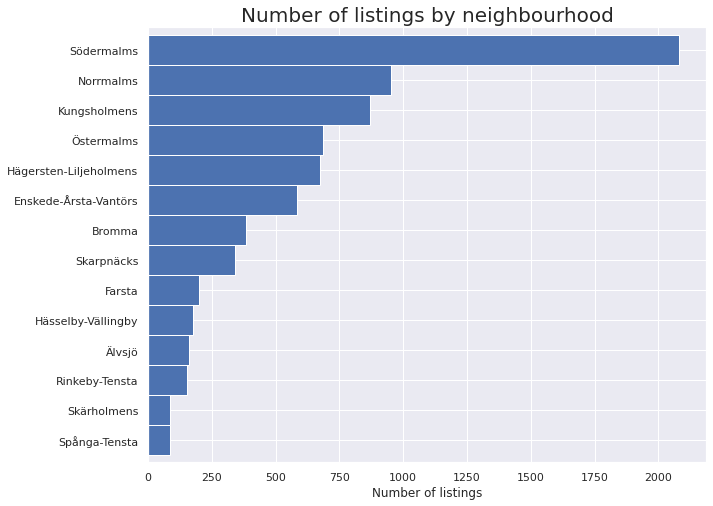

In [22]:
feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [23]:
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[59.3293, 18.0686], zoom_start=10.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

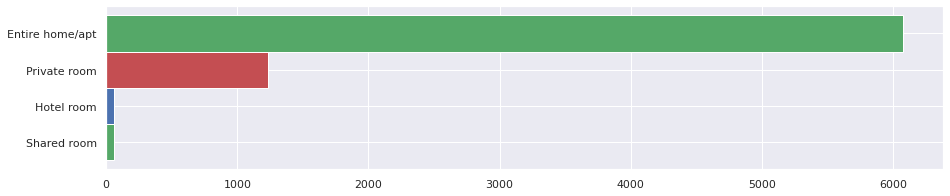

In [24]:
freq = listings['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()

In [25]:
listings.property_type.unique()

array(['House', 'Apartment', 'Guesthouse', 'Townhouse', 'Loft',
       'Condominium', 'Villa', 'Serviced apartment', 'Bed and breakfast',
       'Other', 'Cabin', 'Treehouse', 'Boat', 'Camper/RV', 'Guest suite',
       'Hostel', 'Hotel', 'Earth house', 'Farm stay', 'Aparthotel',
       'Boutique hotel', 'Houseboat', 'Tiny house', 'In-law'],
      dtype=object)

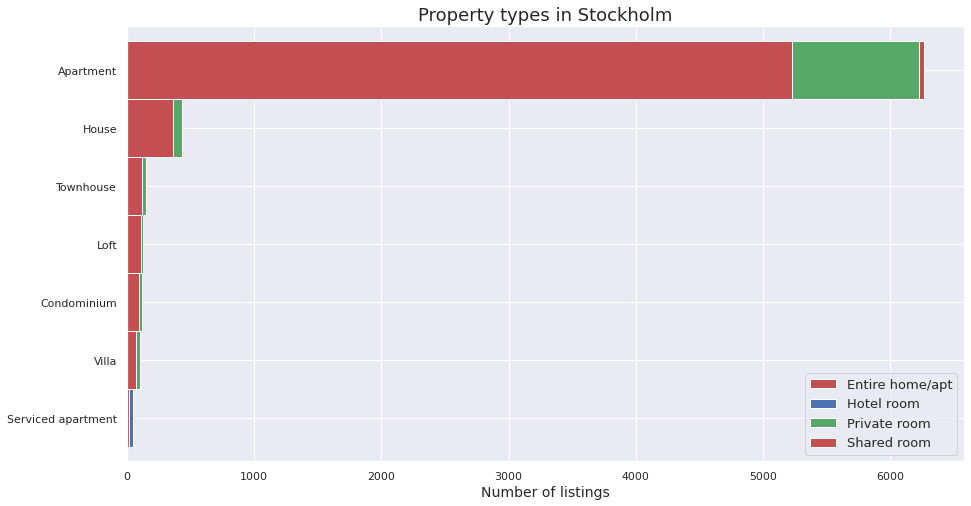

In [26]:
#####################################################################3 review
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=33]########################################
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Stockholm', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

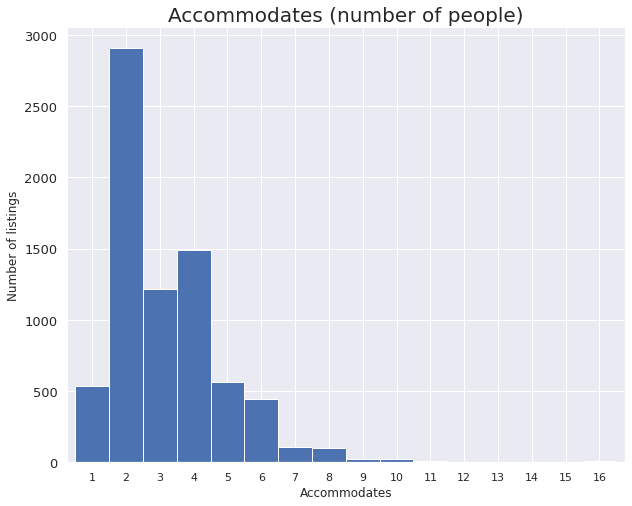

In [27]:
feq=listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

In [28]:
private = listings[listings['room_type'] == "Private room"]
host_private = private.groupby(['host_id', 'host_name', 'street']).size().reset_index(name='private_rooms').sort_values(by=['private_rooms'], ascending=False)
host_private.head()

host_id  ... private_rooms
844  155345174  ...             9
981  260094228  ...             7
910  201043701  ...             7
979  259019701  ...             6
15      906001  ...             6

[5 rows x 4 columns]

In [29]:
listings['room_type'].value_counts()

Entire home/apt    6079
Private room       1234
Hotel room           63
Shared room          56
Name: room_type, dtype: int64

In [30]:
Forenom_Stockholm = private[private['host_id']== 155345174]
Forenom_Stockholm = Forenom_Stockholm[['name','host_id', 'host_name', 'latitude', 'longitude']]
Forenom_Stockholm.index.name = "listing_id"
Forenom_Stockholm

name  ...  longitude
listing_id                                               ...           
22293496    Studio apartment in Stockholm, Voltavägen 6  ...   17.96956
22303806    Studio apartment in Stockholm, Voltavägen 6  ...   17.96882
22303892    Studio apartment in Stockholm, Voltavägen 6  ...   17.96894
22303911    Studio apartment in Stockholm, Voltavägen 6  ...   17.97080
22303934    Studio apartment in Stockholm, Voltavägen 6  ...   17.96898
22364038    Studio apartment in Stockholm, Voltavägen 6  ...   17.96932
22364039    Studio apartment in Stockholm, Voltavägen 6  ...   17.96934
22364041    Studio apartment in Stockholm, Voltavägen 6  ...   17.97049
22364042    Studio apartment in Stockholm, Voltavägen 6  ...   17.97045

[9 rows x 5 columns]

In [31]:
freq = listings.groupby(['host_id']).size().reset_index(name='num_host_listings')
host_prop = freq.groupby(['num_host_listings']).size().reset_index(name='count').transpose()
host_prop.columns = host_prop.iloc[0]
host_prop = host_prop.drop(host_prop.index[0])
host_prop

num_host_listings    1    2   3   4   5   6   7   ...  17  19  20  21  25  26  30
count              6157  299  67  21   6  10   7  ...   1   1   1   1   1   1   1

[1 rows x 18 columns]

In [32]:
freq['host_id'].count

<bound method Series.count of 0            9842
1           16370
2           46529
3           47592
4           67255
          ...    
6579    344265961
6580    344272906
6581    344293585
6582    344426377
6583    344502849
Name: host_id, Length: 6584, dtype: int64>

In [33]:
freq = listings.groupby(['host_id', 'host_name', 'host_about']).size().reset_index(name='num_host_listings')
freq = freq.sort_values(by=['num_host_listings'], ascending=False)
freq = freq[freq['num_host_listings'] >= 10]###############################20
freq

host_id  ... num_host_listings
1476   22876006  ...                30
2291   60382478  ...                25
3128  259629999  ...                21
806     8098890  ...                20
2177   51002540  ...                19
76      1027549  ...                17
3100  243963031  ...                12
2982  186220121  ...                10

[8 rows x 4 columns]

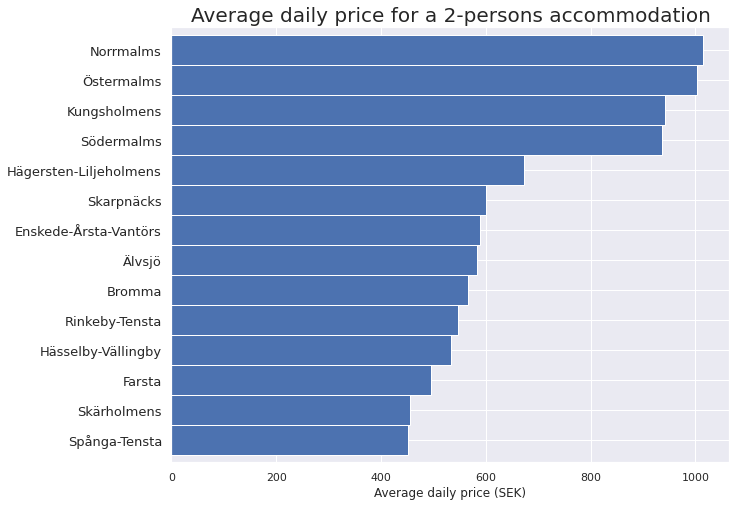

In [34]:
feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (SEK)', fontsize=12)
plt.ylabel("")
plt.show()

In [36]:
adam = gpd.read_file("/content/drive/My Drive/airbnb/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[59.3293,18.0686], zoom_start=10.5)#######
folium.GeoJson(data=adam,
               name='Stockholm',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

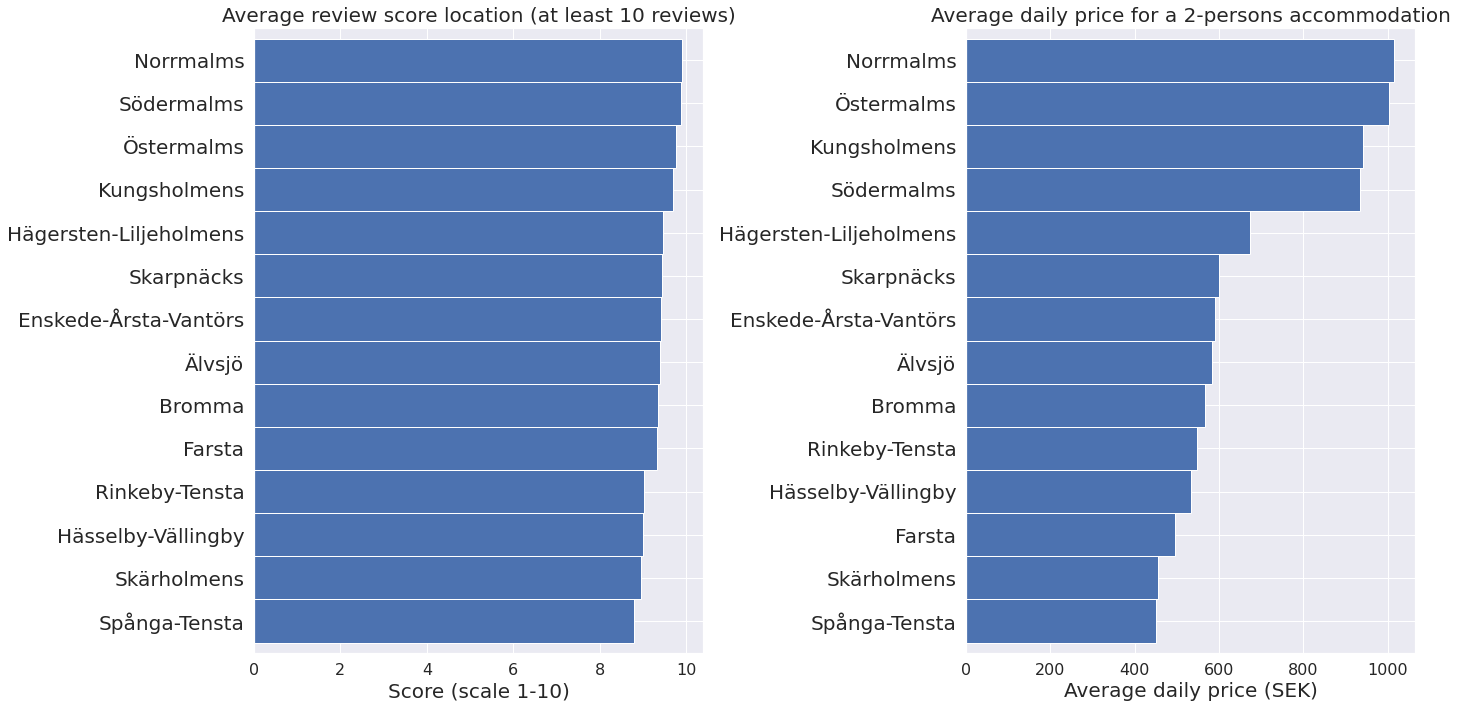

In [37]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = listings[listings['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = listings[listings['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (SEK)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

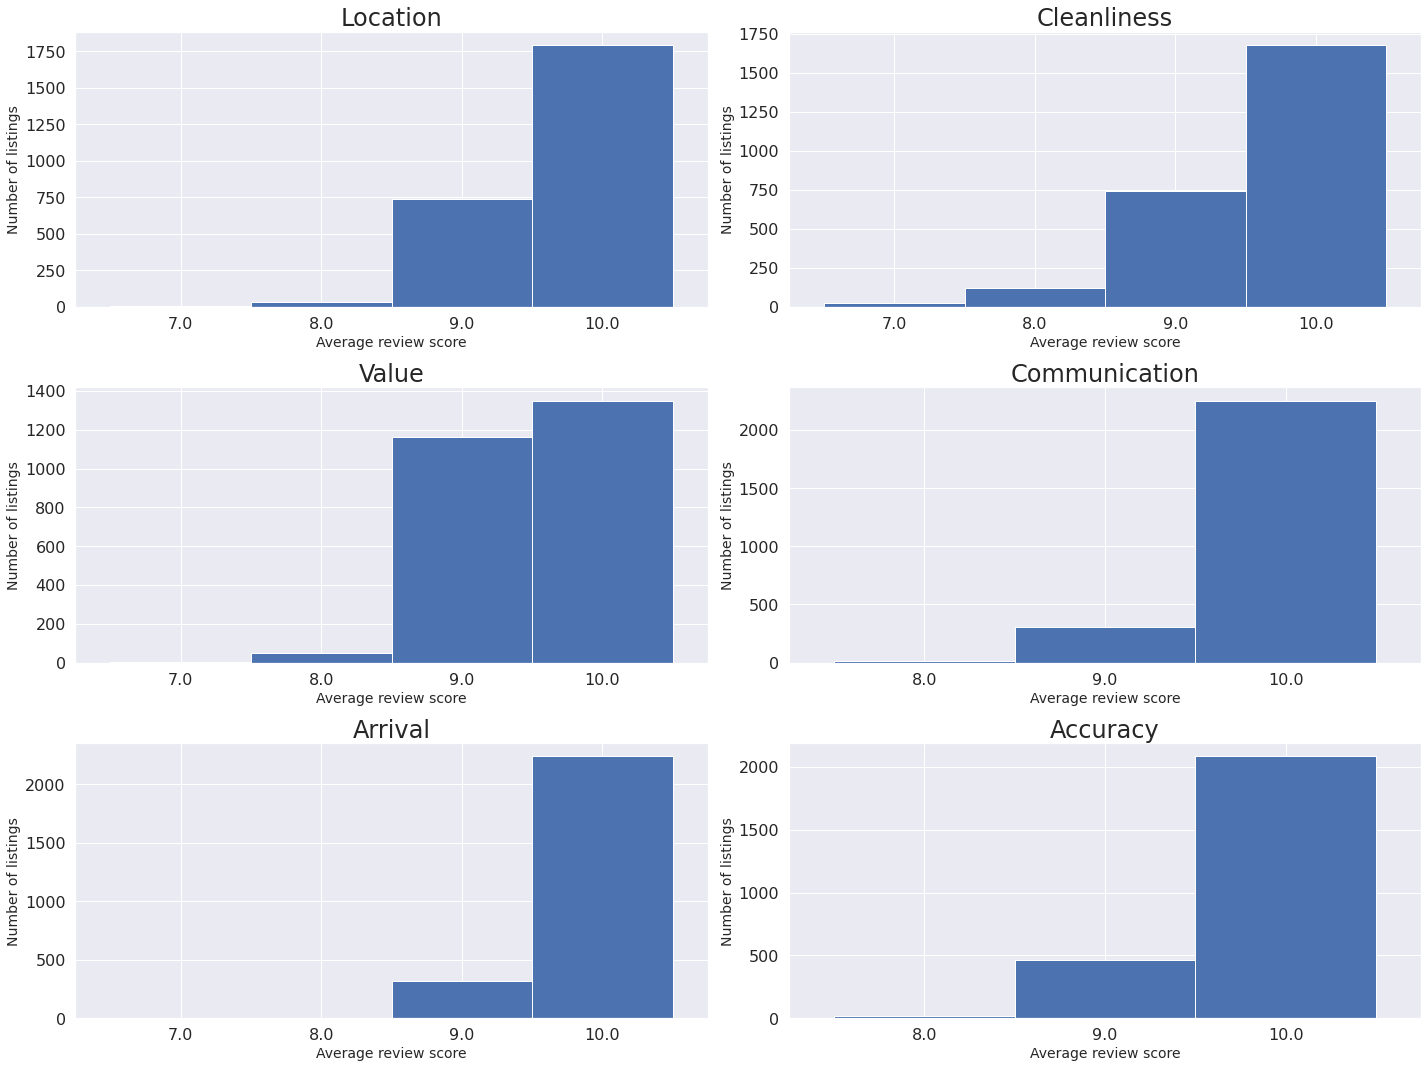

In [38]:
listings10 = listings[listings['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

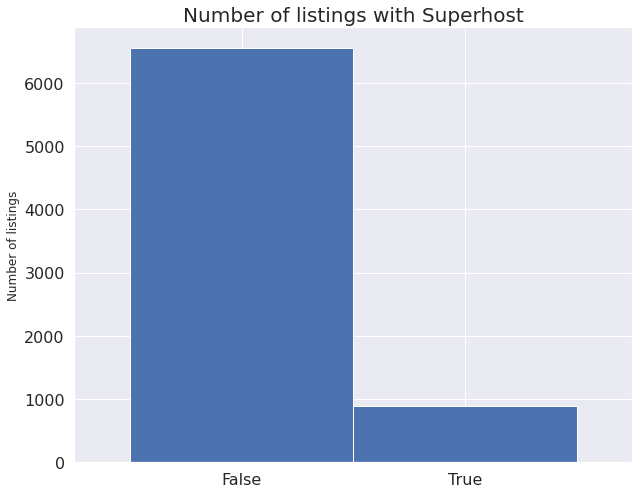

In [39]:
listings.host_is_superhost = listings.host_is_superhost.replace({"t": "True", "f": "False"})

feq=listings['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

In [0]:
feq

In [40]:
listingstrue = listings[listings['host_is_superhost'] == 'True']
listingstrue

name  ...     market
id                                                        ...           
164448       Double room in central Stockholm with Wi-Fi  ...  Stockholm
208662                    Central, large and 3 balconies  ...  Stockholm
242188       Single room in central Stockholm with Wi-Fi  ...  Stockholm
274876                Designer apartment innercity Sthlm  ...  Stockholm
302496                Spacious, bright, unique apartment  ...  Stockholm
...                                                  ...  ...        ...
42798894                       Apartment close to subway  ...  Stockholm
42824363       Twin Room @ Stockholm Hostel (Windowless)  ...  Stockholm
42825028  Quadruple Room @ Stockholm Hostel (Windowless)  ...  Stockholm
42831240               Amazing apartment close to Globen  ...  Stockholm
43162878   Smart & light 2 room apartment in SoFo, 61sqm  ...  Stockholm

[883 rows x 34 columns]

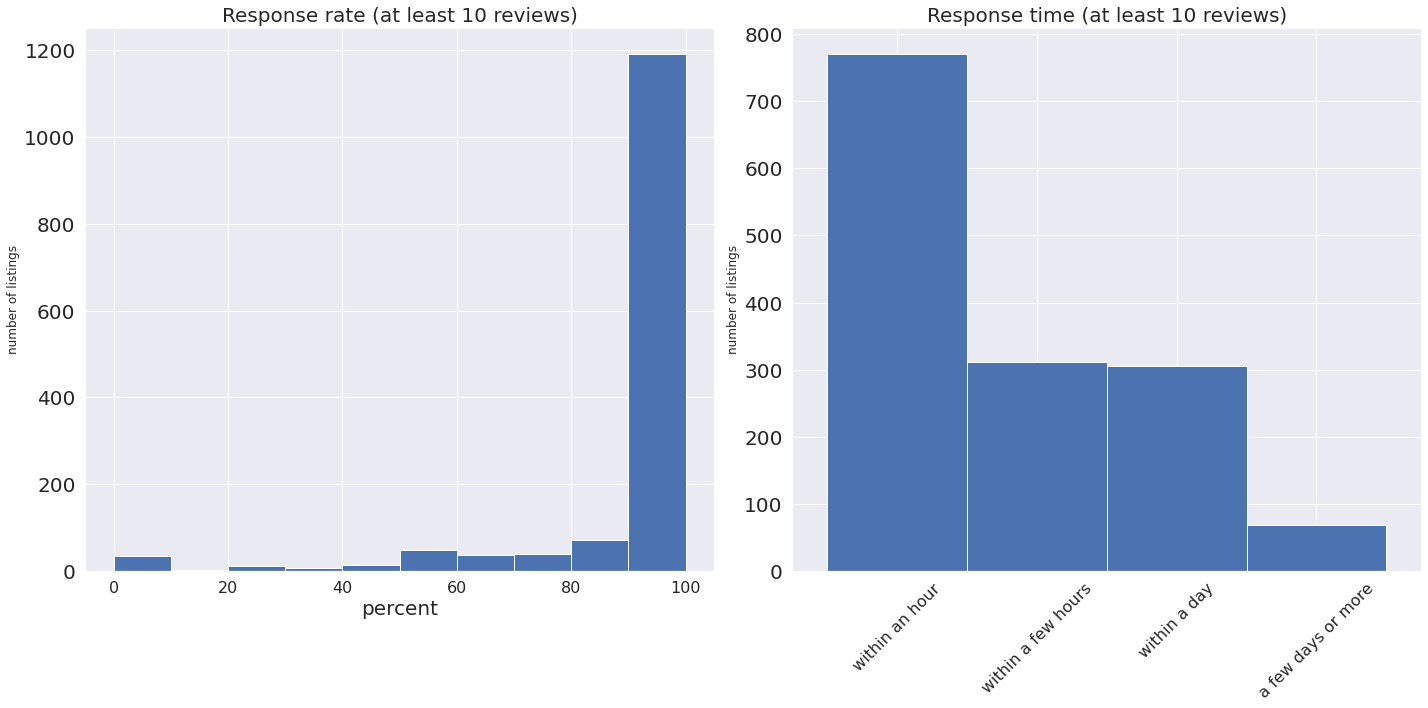

In [41]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq1 = listings10['host_response_rate'].dropna()
ax1= plt.hist(feq1)
plt.title("Response rate (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")
plt.xlabel("percent", fontsize=20)

ax2 = fig.add_subplot(122)
feq2 = listings10['host_response_time'].value_counts()
ax2=feq2.plot.bar(color='b', width=1, rot=45)
plt.title("Response time (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")

plt.tight_layout()
plt.show()

In [0]:
#calendar = pd.read_cv(calendar.csv)
#calendar = pd.read_csv("calendar.csv", parse_dates=['date'], index_col=['listing_id'])

In [0]:
#print(calendar.shape)

In [0]:
#calendar.columns

In [0]:
#calendar.describe

In [0]:
#calendar['price']

In [0]:
#calendar['date']

In [0]:
#calendar = pd.read_csv("calendar.csv", parse_dates=['date'], index_col=['listing_id'])

In [0]:
#calendar1 = calendar

In [0]:
#calendar1.min ()

In [42]:
calendar = calendar[calendar.date < '2021-04-28']
calendar

date available  ... minimum_nights maximum_nights
listing_id                       ...                              
620848     2020-04-28         f  ...              2              5
624886     2020-04-28         f  ...              6             21
624886     2020-04-29         f  ...              6             21
624886     2020-04-30         f  ...              6             21
624886     2020-05-01         f  ...              6             21
...               ...       ...  ...            ...            ...
43208750   2021-04-23         f  ...              3           1125
43208750   2021-04-24         f  ...              3           1125
43208750   2021-04-25         f  ...              3           1125
43208750   2021-04-26         f  ...              3           1125
43208750   2021-04-27         f  ...              3           1125

[2712660 rows x 6 columns]

In [0]:
calendar.price = calendar.price.str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))

In [0]:
calendar

In [44]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")
calendar.columns

Index(['date', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights', 'accommodates'],
      dtype='object')

In [0]:
calendar = calendar.drop(columns=['adjusted_price','minimum_nights','maximum_nights'])

In [46]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")
calendar.columns

Index(['date', 'available', 'price', 'accommodates_x', 'accommodates_y'], dtype='object')

In [47]:
calendar.sample(15)

date available   price  accommodates_x  accommodates_y
listing_id                                                             
543045     2021-04-11         f  1000.0               4               4
12871725   2020-07-14         f   765.0               2               2
4482268    2020-10-01         f   950.0               3               3
40400665   2020-04-30         t   800.0               3               3
13685399   2020-06-03         f  1900.0               5               5
30930491   2020-11-11         t   200.0               1               1
8733164    2020-07-17         f  1200.0               2               2
12524391   2021-02-20         f   860.0               5               5
35157010   2020-10-10         t   450.0               1               1
17746456   2020-08-15         f  1665.0               5               5
34571727   2021-03-13         f  2000.0               5               5
5742562    2020-09-13         f  1300.0               2               2
16661911   2020-06-28         f  1500.0               5               5
3408369    2021-02-02         f   600.0               3               3
18144982   2020-06-09         f   800.0               2               2

In [48]:
sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_available['weekday'] = sum_available['date'].dt.day_name()
sum_available = sum_available.set_index('date')
print(sum_available)
#sum_available.iplot(y='available', mode = 'lines', xTitle = 'Date', yTitle = 'number of listings available',text='weekday', title = 'Number of listings available by date')

            available    weekday
date                            
2020-04-28        551    Tuesday
2020-04-29        943  Wednesday
2020-04-30       1208   Thursday
2020-05-01       1349     Friday
2020-05-02       1357   Saturday
...               ...        ...
2021-04-23       1120     Friday
2021-04-24       1122   Saturday
2021-04-25       1122     Sunday
2021-04-26       1133     Monday
2021-04-27       1135    Tuesday

[365 rows x 2 columns]


In [0]:
##sum_available.iplot(y='available', mode = 'lines', xTitle = 'Date', yTitle = 'number of listings available',text='weekday', title = 'Number of listings available by date')

In [0]:
average_price = calendar[(calendar.available == "t") & (calendar.accommodates_x== 2)].groupby(['date']).mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')

average_price.iplot(y='price', mode='lines', xTitle='Date', yTitle='Price',
    text='weekday', title='Average price of available 2 persons accommodation by date')

In [51]:
reviews_details.shape

(118852, 6)

In [52]:
reviews_details = pd.merge(reviews_details, listings[['host_id', 'host_name', 'name']], on = "listing_id", how = "left")
reviews_details = reviews_details.set_index('id')
reviews_details = reviews_details[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
reviews_details.head()

listing_id  ...                                           comments
id                   ...                                                   
469991       155685  ...  Robert is a great host.  His apartment is beau...
830804       155685  ...  We spent one week in Stockholm and the flat of...
882062       155685  ...  The host canceled my reservation 3 days before...
1118916      155685  ...  This appartment is perfect! Is clean, very wel...
1179025      155685  ...  The flat is spacious, very well decorated and ...

[5 rows x 8 columns]

In [53]:
host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews.head()

number_of_reviews
host_id host_name                   
8547277 Tom                     1570
6451984 Peter                   1272
8817226 Marcus                  1217
1027549 William                 1133
8098890 Robin                   1120

In [54]:
reviews_details.comments.head()

id
469991     Robert is a great host.  His apartment is beau...
830804     We spent one week in Stockholm and the flat of...
882062     The host canceled my reservation 3 days before...
1118916    This appartment is perfect! Is clean, very wel...
1179025    The flat is spacious, very well decorated and ...
Name: comments, dtype: object

In [61]:
reviews_details.comments.values[2] #print comment with numbers and windows line break

'host canceled reservation days arrival '

In [59]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [60]:
#take out empty comments (530)
reviews_details = reviews_details[reviews_details['comments'].notnull()]

#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '') 
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

reviews_details.comments.values[2] #print same comments again

'host canceled reservation days arrival '

In [62]:
host_names = reviews_details[['host_name']].drop_duplicates()
host_names = host_names.host_name.str.lower().tolist()

reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                       if i not in (host_names)]))

len(host_names)

1753

In [63]:
texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

words  counts
2    apartment   53267
0        great   48577
67       place   44002
22   stockholm   38881
25        nice   34487
124   location   32417
1         host   27956
51       clean   27351
113         us   23438
64   recommend   21773

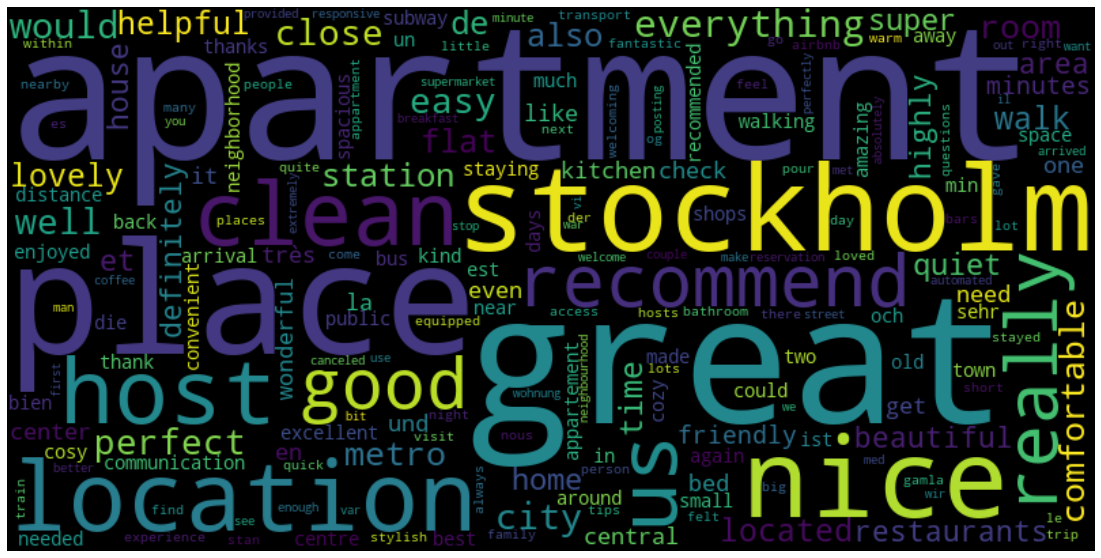

In [64]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
